In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
import tensorflow as tf

2024-03-08 12:12:36.686594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 12:12:36.686692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 12:12:36.816508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load and split Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data Exploration

In [3]:
print(train_images.shape, train_labels.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(60000, 28, 28) (60000,)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

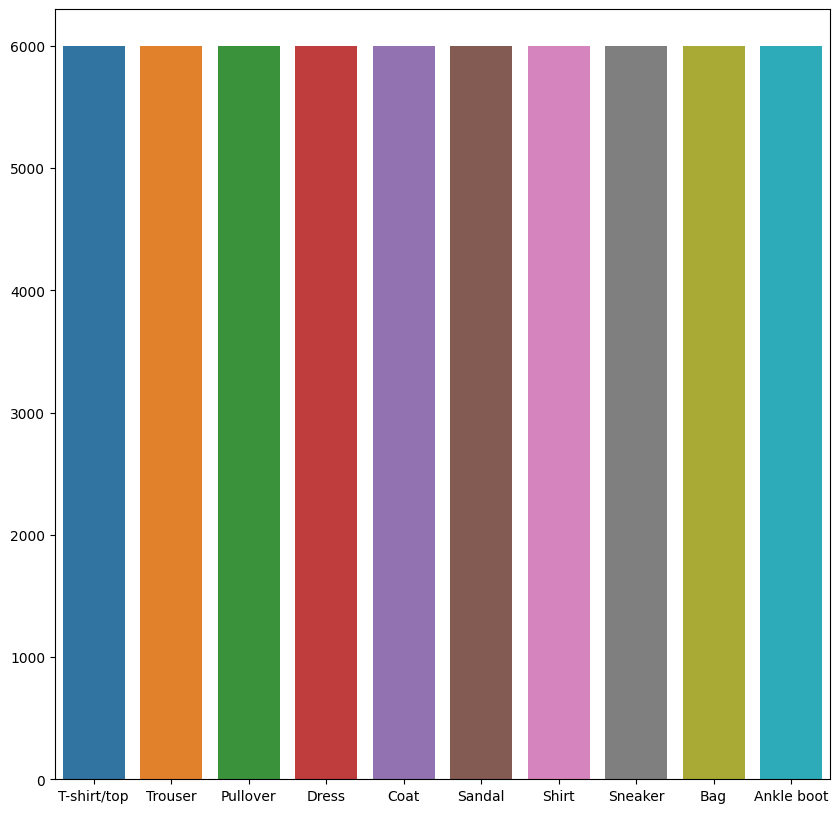

In [4]:
unique, counts = np.unique(train_labels, return_counts = True)
plt.figure(figsize=(10, 10))
sns.barplot(x=class_names, y=counts)

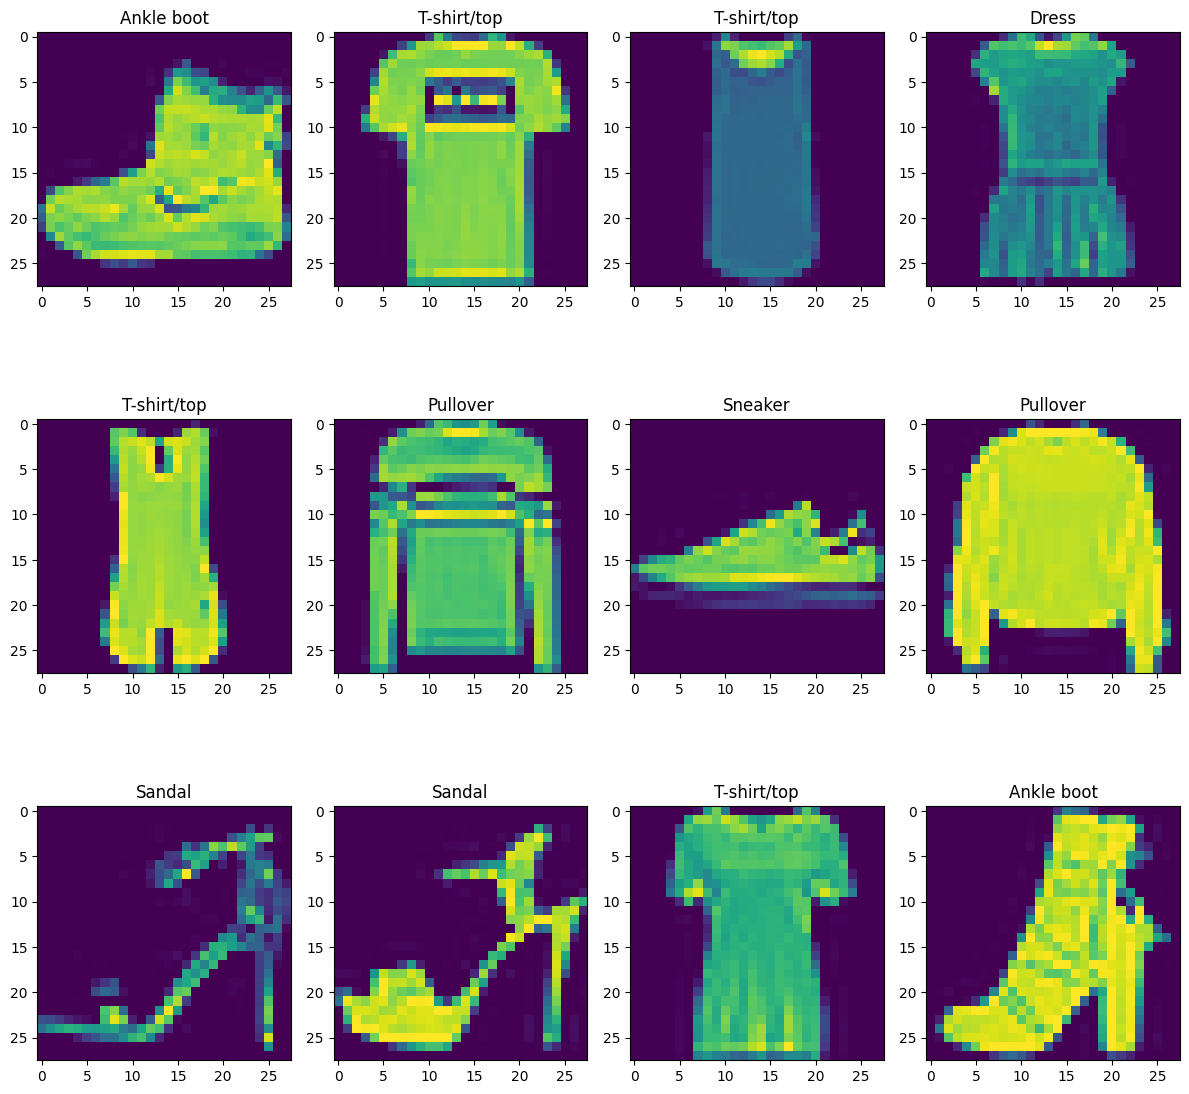

In [5]:
fig = plt.figure(figsize=(12, 12))
row, cols = 3, 4
i = 1
for img, label in zip(train_images, train_labels):
    fig.add_subplot(row, cols, i)
    plt.imshow(img)
    plt.title(class_names[label])
    i+=1
    if i==13:
        break
plt.tight_layout()
plt.show()

# Preprocessing

In [6]:
train_images = train_images / 255.0  
test_images = test_images / 255.0

# Building Models

In [7]:
Epochs = 100
early_stop = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    monitor = 'val_loss',
    restore_best_weights=True
)

### Configuration 1

In [8]:
model_0 = tf.keras.Sequential()
model_0.add(layers.Flatten())
model_0.add(layers.Dense(10, activation='softmax'))

model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_0.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history_0 = model_0.fit(
    train_images, 
    train_labels,
    epochs = Epochs,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100
 112/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3061 - loss: 1.9874

I0000 00:00:1709899972.636900      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6403 - loss: 1.1495 - val_accuracy: 0.7888 - val_loss: 0.6534
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7958 - loss: 0.6356 - val_accuracy: 0.8101 - val_loss: 0.5780
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8133 - loss: 0.5705 - val_accuracy: 0.8183 - val_loss: 0.5451
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8230 - loss: 0.5358 - val_accuracy: 0.8242 - val_loss: 0.5222
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8316 - loss: 0.5119 - val_accuracy: 0.8262 - val_loss: 0.5081
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8332 - loss: 0.5060 - val_accuracy: 0.8302 - val_loss: 0.5011
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8350 - loss: 0.4947 - val_accuracy: 0.8325 - val_loss: 0.4895
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8420 - loss: 0.4785 - val_

### Configuration 2

In [11]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.Input(shape=(28, 28, 1)))
model_1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model_1.add(layers.AveragePooling2D(pool_size=(2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,090 (492.54 KB)

 Trainable params: 126,090 (492.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_1.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history_1 = model_1.fit(
    train_images, 
    train_labels,
    epochs = Epochs,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6525 - loss: 1.0853 - val_accuracy: 0.7862 - val_loss: 0.5770
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8023 - loss: 0.5562 - val_accuracy: 0.8001 - val_loss: 0.5502
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8179 - loss: 0.5192 - val_accuracy: 0.8366 - val_loss: 0.4796
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8281 - loss: 0.4905 - val_accuracy: 0.8217 - val_loss: 0.5068
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8318 - loss: 0.4856 - val_accuracy: 0.8384 - val_loss: 0.4655
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8400 - loss: 0.4631 - val_accuracy: 0.8223 - val_loss: 0.4931
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8421 - loss: 0.4581 - val_accuracy: 0.8424 - val_loss: 0.4530
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8481 - loss: 0

### Configuration 3

In [14]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.Input(shape=(28, 28, 1)))
model_2.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(layers.Dropout(0.3))
model_2.add(layers.BatchNormalization())

model_2.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model_2.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Dense(10, activation="softmax"))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,298 (1.94 MB)

 Trainable params: 508,170 (1.94 MB)

 Non-trainable params: 128 (512.00 B)

In [15]:
model_2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
with tf.device('/device:gpu:0'):
    history_2 = model_2.fit(
            train_images, 
            train_labels,
            epochs = Epochs,
            validation_split=0.2,
        )

Epoch 1/100


2024-03-08 12:17:39.889863: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-03-08 12:17:39.889922: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-03-08 12:17:39.889931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-03-08 12:17:39.889939: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-03-08 12:17:39.889947: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-03-08 12:17:39.889955: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-03-08 12:17:39.889963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-03-08 12:17:39.889970: E external/local_xla/xla/se

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6418 - loss: 0.9926 - val_accuracy: 0.7947 - val_loss: 0.5240
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8192 - loss: 0.4877 - val_accuracy: 0.8579 - val_loss: 0.3940
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8505 - loss: 0.4098 - val_accuracy: 0.8664 - val_loss: 0.3600
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.3710 - val_accuracy: 0.8803 - val_loss: 0.3286
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8730 - loss: 0.3446 - val_accuracy: 0.8805 - val_loss: 0.3198
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8810 - loss: 0.3214 - val_accuracy: 0.8878 - val_loss: 0.3050
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8902 - loss: 0.3016 - val_accuracy: 0.8925 - val_loss: 0.2909
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8954 - loss: 0.2881 - val

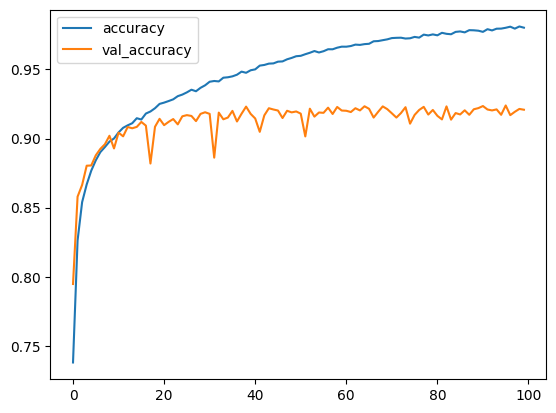

In [17]:
plt.plot([i for i in range(Epochs)], history_2.history['accuracy'], label='accuracy')
plt.plot([i for i in range(Epochs)], history_2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

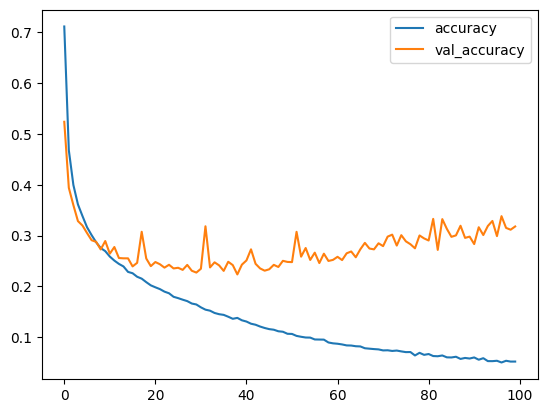

In [18]:
plt.plot([i for i in range(Epochs)], history_2.history['loss'], label='accuracy')
plt.plot([i for i in range(Epochs)], history_2.history['val_loss'], label='val_accuracy')
plt.legend()
plt.show()

In [19]:
with tf.device('/device:gpu:0'):
    y_pred = model_2.predict(test_images)

296/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2024-03-08 12:25:34.917546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-03-08 12:25:34.917607: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-03-08 12:25:34.917617: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-03-08 12:25:34.917625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-03-08 12:25:34.917633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-03-08 12:25:34.917640: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-03-08 12:25:34.917648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-03-08 12:25:34.917656: E external/local_xla/xla/ser

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


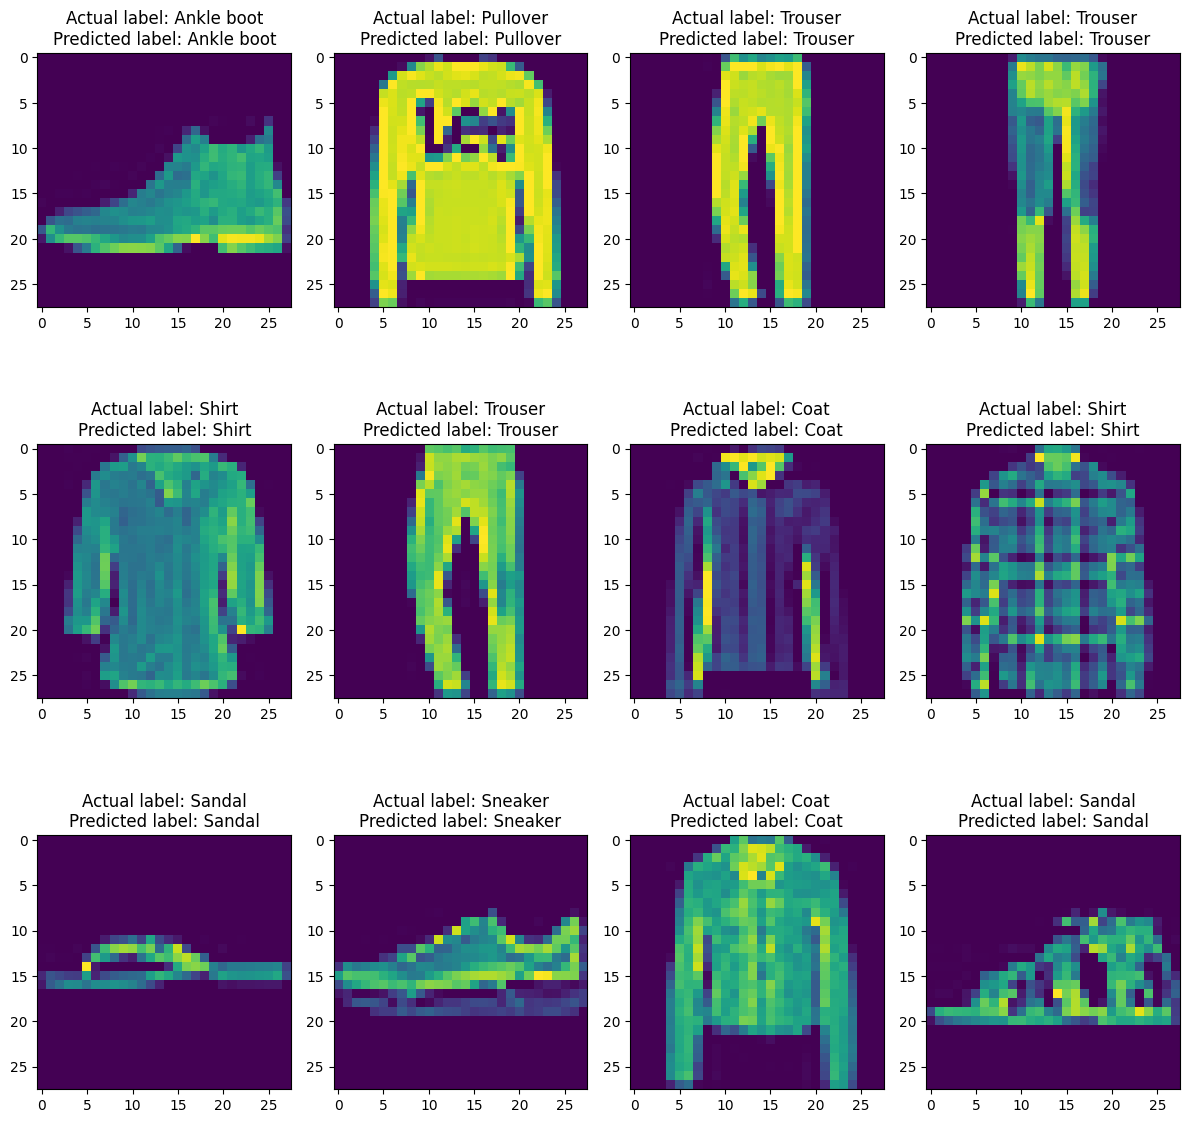

In [20]:
fig = plt.figure(figsize=(12, 12))
row, col = 3, 4
i=1
for j, img in enumerate(test_images):
    fig.add_subplot(row, col, i)
    plt.imshow(img)
    plt.title(f'Actual label: {class_names[test_labels[j]]}\nPredicted label: {class_names[np.argmax(y_pred[j])]}')
    i+=1
    if i == 13:
        break
plt.tight_layout()
plt.show()